<a href="https://colab.research.google.com/github/tachi123/python-analisis-datos/blob/main/Tp_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final Diplomatura CSC
Santiago Barandiarán - Nahuel Ramirez Lorca

Trabajaremos con datos de proyectos de investigación científica del año 2017, descargados del portal de datos abiertos del MINCYT.
En primer término haremos un análisis descriptivo de las variables de interés que contiene el dataset. Luego nos enfocaremos en un modelo explicativo de los montos financiados en los proyectos.

Usamos tres datasets descargados del portal:
https://datasets.datos.mincyt.gob.ar/dataset/

- Proyectos científicos del 2017
https://datasets.datos.mincyt.gob.ar/dataset/proyectos-de-ciencia-tecnologia-e-innovacion/archivo/60675091-b5ca-4d2d-af9d-cbaffd23b16e
- Disciplinas de los proyectos
https://datasets.datos.mincyt.gob.ar/dataset/proyectos-de-ciencia-tecnologia-e-innovacion/archivo/aa97dfd8-4146-4f07-97b5-c36c6a7e9521

- Referencia para las disciplinas de los proyectos  https://datasets.datos.mincyt.gob.ar/dataset/proyectos-de-ciencia-tecnologia-e-innovacion/archivo/1485e432-60f8-4f93-9710-8266d7e98c24




## Parte 1. Carga y análisis descriptivo de los datos

En este primer bloque levantamos los csvs descargados del portal, y los unimos para tener la información consolidada en un dataframe. Dado que el dataset contiene datos de proyectos científicos y también de proyectos de desarrollo tecnológico y de innovación, vamos a filtrar el dataset para concentrarnos únicamente en los proyectos de investigación científica.

In [ ]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#levantar csvs
df_proy = pd.read_csv('proyectos_2017.csv', sep=';')
df_proy_dis = pd.read_csv('proyecto_disciplina.csv', sep=';')
df_ref_dis = pd.read_csv('ref_disciplina.csv', sep=';')

In [ ]:
#unir los datos de disciplina id de los proyectos con la tabla de referencia de disciplina
df_proy_dis_ref = df_proy_dis.merge(df_ref_dis, on='disciplina_id', how='left')

In [ ]:
#unir dataset final, con los datos de proyectos y sus disciplinas
df = df_proy.merge(df_proy_dis_ref, on='proyecto_id', how='left')

In [ ]:
df.head()

,proyecto_id,proyecto_fuente,titulo,fecha_inicio,fecha_finalizacion,resumen,moneda_id,monto_total_solicitado,monto_total_adjudicado,monto_financiado_solicitado,...,cantidad_miembros_F,cantidad_miembros_M,sexo_director,disciplina_id,gran_area_codigo,gran_area_descripcion,area_codigo,area_descripcion,disciplina_codigo,disciplina_descripcion
0,21764,CONICET,Estructura y funciones de proteínas que intera...,2017/04/01 00:00:00.000,2021/03/31 00:00:00.000,El INIBIOLP tiene vasta experiencia en estudio...,1,5000000.0,5000000.0,5000000.0,...,59.0,27.0,M,38.0,1.0,CIENCIAS NATURALES Y EXACTAS,1.6,Ciencias Biológicas,1.6.3,Bioquímica y Biología Molecular (ídem 3.1.10)
1,21764,CONICET,Estructura y funciones de proteínas que intera...,2017/04/01 00:00:00.000,2021/03/31 00:00:00.000,El INIBIOLP tiene vasta experiencia en estudio...,1,5000000.0,5000000.0,5000000.0,...,59.0,27.0,M,41.0,1.0,CIENCIAS NATURALES Y EXACTAS,1.6,Ciencias Biológicas,1.6.6,Biofísica
2,21765,CONICET,Configuración y reconfiguración socioterritori...,2017/04/01 00:00:00.000,2021/03/31 00:00:00.000,En este proyecto nos proponemos actualizar y r...,1,4550000.0,4550000.0,4550000.0,...,27.0,21.0,M,215.0,5.0,CIENCIAS SOCIALES,5.7,Geografía Económica y Social,5.7.2,Geografía Cultural y Económica
3,21765,CONICET,Configuración y reconfiguración socioterritori...,2017/04/01 00:00:00.000,2021/03/31 00:00:00.000,En este proyecto nos proponemos actualizar y r...,1,4550000.0,4550000.0,4550000.0,...,27.0,21.0,M,227.0,6.0,HUMANIDADES,6.1,Historia y Arqueología,6.1.1,Historia (la historia de la Ciencia y Tecnolog...
4,21766,CONICET,Las 'Ómicas' al servicio de la producción anim...,2017/04/01 00:00:00.000,2021/03/31 00:00:00.000,El IGEVET posee una vasta trayectoria en estud...,1,5000000.0,5000000.0,5000000.0,...,30.0,19.0,F,42.0,1.0,CIENCIAS NATURALES Y EXACTAS,1.6,Ciencias Biológicas,1.6.7,"Genética y Herencia (Genética Médica va en 3 ""..."


In [ ]:
#filtrar los proyectos científicos, que tienen dato de disciplina. Dejamos afuera los proyectos de innovacion, que no tienen ese dato
df = df.query('disciplina_id >= 1')

#seleccionamos las columnas que vamos a usar
df = df[['proyecto_id','proyecto_fuente','monto_financiado_solicitado','monto_financiado_adjudicado','gran_area_descripcion','sexo_director']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 2259
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   proyecto_id                  1377 non-null   int64  
 1   proyecto_fuente              1377 non-null   object 
 2   monto_financiado_solicitado  1377 non-null   float64
 3   monto_financiado_adjudicado  1377 non-null   float64
 4   gran_area_descripcion        1377 non-null   object 
 5   sexo_director                1377 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 75.3+ KB


El dataframe que analizaremos tiene 1377 registros, y 6 columnas con variables de los proyectos:
- Id: no es de interés para el análisis
- fuente: indica la fuente de financiamiento del proyecto
- monto solicitado: monto en pesos solicitado por el grupo de investigación
- monto adjudidado: monto en pesos adjudicado por la institución financiadora
- gran área: clasificación del proyecto en las 6 grandes áreas del conocimiento según tabla FOS-OCDE
- sexo: indica sexo de la persona que dirige el proyecto

In [ ]:
df.proyecto_fuente.value_counts()

ANPCYT     717
CONICET    660
Name: proyecto_fuente, dtype: int64

In [ ]:
df.gran_area_descripcion.value_counts()

CIENCIAS NATURALES Y EXACTAS      602
INGENIERÍAS Y TECNOLOGÍAS         277
CIENCIAS SOCIALES                 174
CIENCIAS AGRÍCOLAS                171
CIENCIAS MÉDICAS Y DE LA SALUD     81
HUMANIDADES                        72
Name: gran_area_descripcion, dtype: int64

In [ ]:
df.sexo_director.value_counts()

M    694
F    683
Name: sexo_director, dtype: int64

En cuanto a las variables cualitativas del dataset, podemos ver que los proyectos se reparten en proporciones casi iguales entre los financiados por el CONICET y los financiados por la AGENCIA NACIONAL DE I+D+i.
La distribución por gran área del conocimiento se concentra mayoritariamente en las ciencias naturales y exactas y las ingenierías y tecnologías.
Y la dirección de los proyectos es pareja entre varones y mujeres.

In [ ]:
df.describe()

,proyecto_id,monto_financiado_solicitado,monto_financiado_adjudicado
count,1377.000000,1.377000e+03,1.377000e+03
mean,21639.716049,1.000040e+06,9.892189e+05
std,1244.982405,1.578331e+06,1.556225e+06
min,19318.000000,3.000000e+02,3.000000e+02
25%,20122.000000,1.500000e+05,1.500000e+05
50%,21992.000000,3.000000e+05,3.000000e+05
75%,22279.000000,7.500000e+05,7.500000e+05
max,24565.000000,5.000000e+06,5.000000e+06


Las dos variables cuantitativas que analizamos tienen medidas de tendencia central y de dispersión prácticamente idénticas, lo que indica que no hay mucha diferencia entre los montos solicitados y los finalmente adjudicados. En promedio esos montos son de 1 millón de pesos corrientes del año 2017, aunque es mejor mirar el monto mediano de 300.000 pesos, y observar que el 50% central de los proyectos oscila entre 150.000 y 750.000 pesos, ya que la desviación estándar es de una magnitud mayor al promedio (valores extremos muy altos).

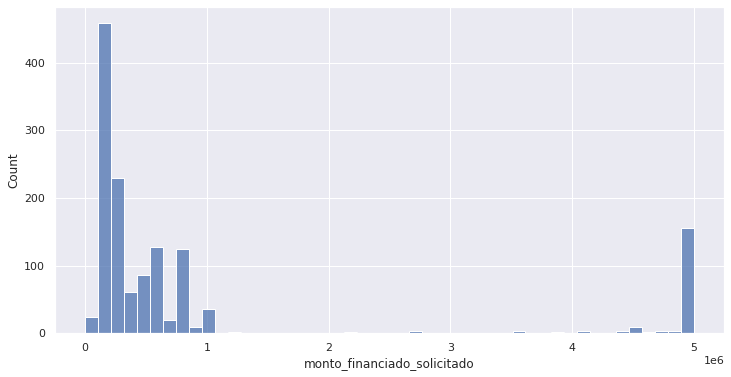

In [ ]:
sns.histplot(df,x='monto_financiado_solicitado')
sns.set(rc={'figure.figsize':(18,9)})


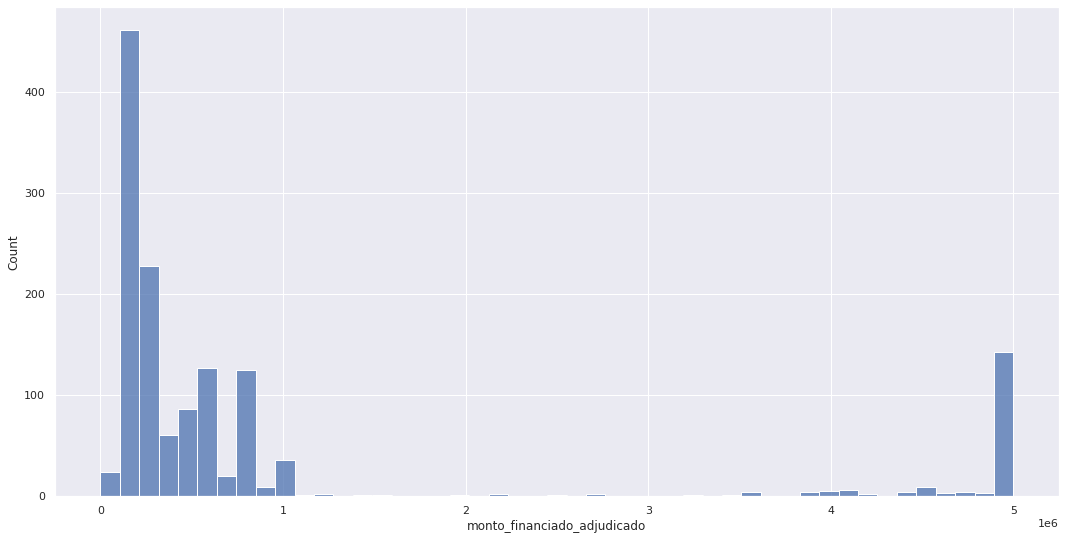

In [ ]:
sns.histplot(df,x='monto_financiado_adjudicado')
sns.set(rc={'figure.figsize':(18,9)})

Mirando los histogramas podemos entender mejor el problemna de los proyectos de montos altos, que no son unos pocos casos sino más bien un grupo de proyectos con montos alrededor de los 5 millones claramente separado del resto.

In [ ]:
#calcular la diferencia entre monto solicitado y adjudicado
df['diferencia'] = df.monto_financiado_solicitado - df.monto_financiado_adjudicado

In [ ]:
df.describe()

,proyecto_id,monto_financiado_solicitado,monto_financiado_adjudicado,diferencia
count,1377.000000,1.377000e+03,1.377000e+03,1.377000e+03
mean,21639.716049,1.000040e+06,9.892189e+05,1.082136e+04
std,1244.982405,1.578331e+06,1.556225e+06,1.035079e+05
min,19318.000000,3.000000e+02,3.000000e+02,0.000000e+00
25%,20122.000000,1.500000e+05,1.500000e+05,0.000000e+00
50%,21992.000000,3.000000e+05,3.000000e+05,0.000000e+00
75%,22279.000000,7.500000e+05,7.500000e+05,0.000000e+00
max,24565.000000,5.000000e+06,5.000000e+06,1.800000e+06


Calculando la diferencia entre monto solicitado y adjudicado confirmamos que efectivamente en más del 75% de los proyectos la diferencia es cero.

## Parte 2. Exploración de relaciones entre variables

Tomaremos al monto solicitado de los proyectos como variable a ser explicada. Con esa orientación, exploramos si hay diferencias en los montos según la fuente de financiamiento, el gran área y el sexo del director/a.

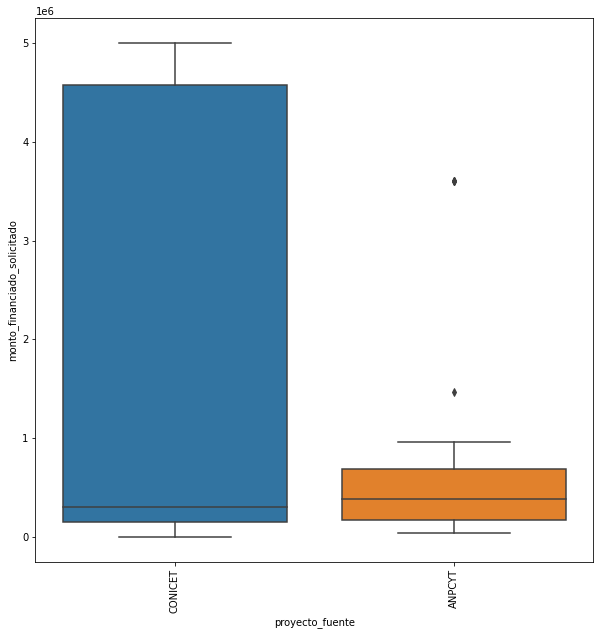

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.boxplot( x=df['proyecto_fuente'], y=df['monto_financiado_solicitado']);
plt.xticks(rotation = 90)
plt.show()

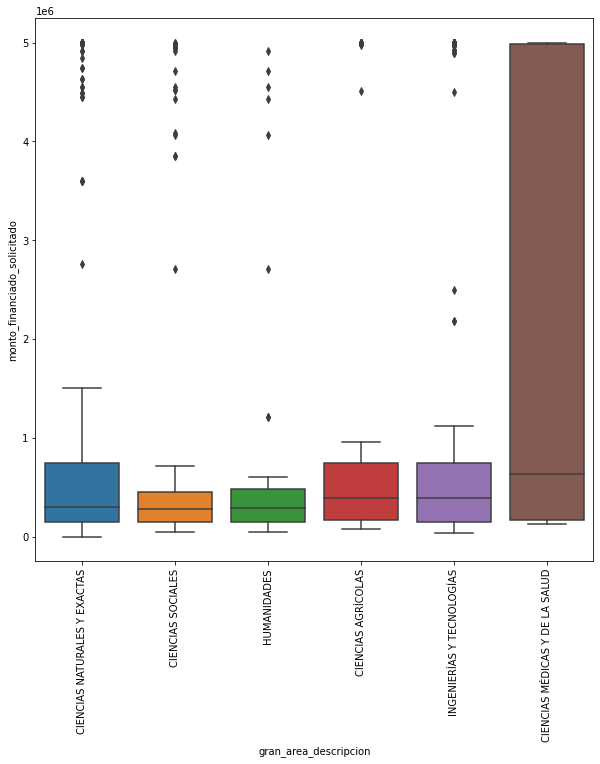

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.boxplot( x=df['gran_area_descripcion'], y=df['monto_financiado_solicitado']);
plt.xticks(rotation = 90)
plt.show()

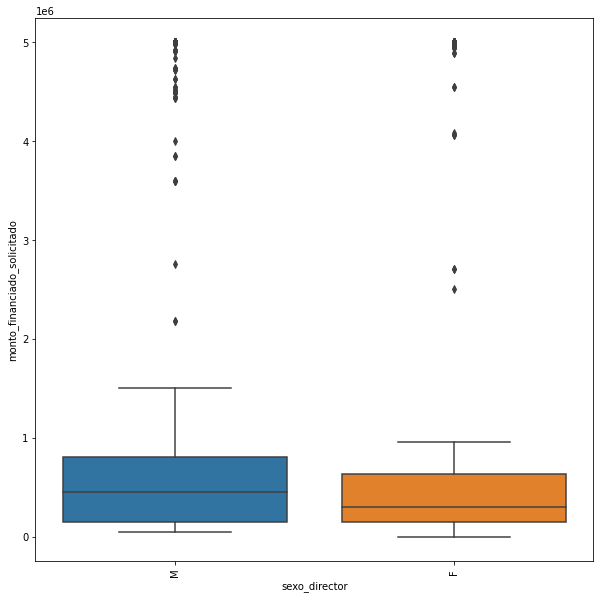

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.boxplot( x=df['sexo_director'], y=df['monto_financiado_solicitado']);
plt.xticks(rotation = 90)
plt.show()

Los tres factores evidencian una relación con el monto solicitado.
- La ANPCYT recibe (y adjudica) montos medianos ligeramente más altos que el CONICET, aunque en este último el 3er cuartil es de valores bastante superiores al de ANPCYT.
- Tal como es esperable, los proyectos de ciencias médicas, de ingenierías, de ciencias agrícolas y de ciencias naturales tienen montos mayores a los de humanidades y ciencias sociales.
- Los proyectos dirigidos por varones tienen montos superiores a los dirigidos por mujeres.

Este último resultado es interesante explorarlo un poco más. La diferencia en el monto solicitado según sexo ¿se debe acaso a que hay una asociación entre el sexo del director y el gran área? Para responder esto veremos si esta diferencia se mantiene controlando por gran área


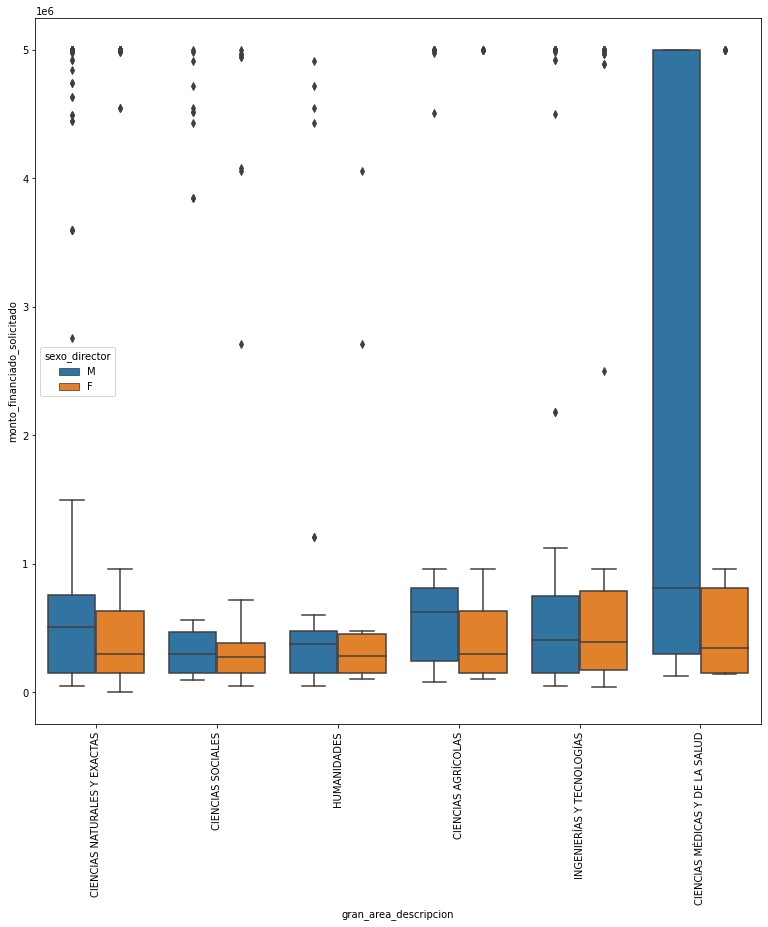

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 13))

sns.boxplot( x=df['gran_area_descripcion'], y=df['monto_financiado_solicitado'], hue=df['sexo_director']);
plt.xticks(rotation = 90)
plt.show()

Tal como podemos ver en el boxplot, las directoras tienden a solicitar (y consecuentemente a recibir) montos menores a los directores en cuatro de las seis grandes áreas del conocimiento (las excepciones son ingenierías y ciencias sociales).


## Parte 3. Modelado supervisado

### 3a. Modelo que prediga el monto - REGRESION LINEAL

Vamos a intentar primero un modelo de regresión lineal para predecir el monto solicitado en función de los factores ya explorados.

In [ ]:
import statsmodels.formula.api as smf

#Modelo completo
lm = smf.ols(formula='monto_financiado_solicitado~sexo_director+gran_area_descripcion+proyecto_fuente',data=df).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     monto_financiado_solicitado   R-squared:                       0.158
Model:                                     OLS   Adj. R-squared:                  0.153
Method:                          Least Squares   F-statistic:                     36.64
Date:                         Tue, 28 Feb 2023   Prob (F-statistic):           3.35e-47
Time:                                 00:22:32   Log-Likelihood:                -21488.
No. Observations:                         1377   AIC:                         4.299e+04
Df Residuals:                             1369   BIC:                         4.303e+04
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                 4.81e+05   1.18e+05      4.060      0.000    2.49e+05    7.13e+05
sexo_director[T.M]                                       2.455e+05   7.87e+04      3.118      0.002    9.11e+04       4e+05
gran_area_descripcion[T.CIENCIAS MÉDICAS Y DE LA SALUD]  3.999e+05   1.97e+05      2.026      0.043    1.27e+04    7.87e+05
gran_area_descripcion[T.CIENCIAS NATURALES Y EXACTAS]    -1.55e+05   1.27e+05     -1.216      0.224   -4.05e+05    9.51e+04
gran_area_descripcion[T.CIENCIAS SOCIALES]              -6.346e+05   1.59e+05     -3.981      0.000   -9.47e+05   -3.22e+05
gran_area_descripcion[T.HUMANIDADES]                    -4.485e+05   2.04e+05     -2.194      0.028    -8.5e+05   -4.75e+04
gran_area_descripcion[T.INGENIERÍAS Y TECNOLOGÍAS]        -1.2e+05   1.43e+05     -0.840      0.401      -4e+05     1.6e+05
proyecto_fuente[T.CONICET]                               1.184e+06      8e+04     14.787      0.000    1.03e+06    1.34e+06
==============================================================================
Omnibus:                      255.266   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.133
Skew:                           1.271   Prob(JB):                     8.72e-90
Kurtosis:                       3.831   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los tres factores resultan significativos, y en conjunto explican un 15% de la variabilidad del monto.
Controlando por los demás factores, los varones solicitan $245.000 más que las mujeres.


### 3b. Modelo que prediga el monto - ARBOL DE REGRESION

En segundo lugar, intentamos mejorar la performance predictiva con un árbol de regresión. Para esto necesitamos preparar las variables categóricas en dummies y generar la partición del dataset en muestra de entrenamiento y de prueba.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Variables
df_2 = df[['monto_financiado_solicitado','sexo_director','proyecto_fuente','gran_area_descripcion']]

#generar dummies para categoricas
df_2=pd.concat([df_2,pd.get_dummies(df_2['sexo_director'],prefix='sexo_director')],axis=1).drop(['sexo_director'],axis=1)
df_2=pd.concat([df_2,pd.get_dummies(df_2['proyecto_fuente'],prefix='proyecto_fuente')],axis=1).drop(['proyecto_fuente'],axis=1)
df_2=pd.concat([df_2,pd.get_dummies(df_2['gran_area_descripcion'],prefix='gran_area_descripcion')],axis=1).drop(['gran_area_descripcion'],axis=1)

#generar set de predictoras
X = df_2[df_2.columns[1:10]]

#generar la variable objetivo
y = df_2[df_2.columns[0]]



In [ ]:
#importar método de train y test de Scikit-Learn
from sklearn.model_selection import train_test_split

In [ ]:
#Dividir en 4 subsegmentos con un test_size de 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [ ]:
#Generar modelo
regtree = DecisionTreeRegressor(min_samples_split=150,min_samples_leaf=50)

In [ ]:
#Ajustar modelo
regtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=50, min_samples_split=150)

In [ ]:
# ver el r2
score = regtree.score(X_test, y_test)
score

0.15685305537489302

El arbol de regresión arroja un resultado similar a la regresión lineal, con un r2 de 0.15.